## 1. Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from matplotlib.ticker import FuncFormatter

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set(style='whitegrid')

%matplotlib inline

## 2. Load data

In [4]:
df_sales = pd.read_csv('../source/sales.csv', parse_dates=['DATE_ORDER'])
df_comp = pd.read_csv('../source/comp_prices.csv', parse_dates=['DATE_EXTRACTION'])

In [5]:
print(f'Total Sales: {df_sales.shape[0]}')
print(f'Total Competitor Price: {df_comp.shape[0]}')

Total Sales: 351091
Total Competitor Price: 50114


In [6]:
df_sales.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE
0,P6,2015-08-02,1.0,1808.99
1,P6,2015-08-17,1.0,1674.00
2,P6,2015-08-17,1.0,1673.95
3,P6,2015-08-11,1.0,1674.00
4,P6,2015-08-17,1.0,1674.00


In [7]:
df_comp.head()

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE
0,P6,2015-01-30 08:11:38,C3,1898.00,1
1,P6,2015-01-30 08:11:38,C1,1898.00,1
2,P6,2015-01-30 08:11:38,C6,1999.90,1
3,P6,2015-01-31 20:10:14,C2,1894.88,2
4,P6,2015-01-31 20:10:14,C3,1894.88,2


## 3. Data Transform

In [8]:
df_sales['YEAR'] = df_sales['DATE_ORDER'].dt.year
df_sales['MONTH'] = df_sales['DATE_ORDER'].dt.month
df_sales['DAY'] = df_sales['DATE_ORDER'].dt.day
df_sales['WEEKDAY'] = df_sales['DATE_ORDER'].dt.weekday

df_comp['DATE'] = pd.to_datetime(df_comp['DATE_EXTRACTION'].dt.date)
df_comp['YEAR'] = df_comp['DATE_EXTRACTION'].dt.year
df_comp['MONTH'] = df_comp['DATE_EXTRACTION'].dt.month
df_comp['DAY'] = df_comp['DATE_EXTRACTION'].dt.day
df_comp['WEEKDAY'] = df_comp['DATE_EXTRACTION'].dt.weekday

In [9]:
df_sales['VL_UNIT'] = round(df_sales['REVENUE'] / df_sales['QTY_ORDER'], 2)

In [10]:
__months__ = np.arange(1, 11)
__days__ = np.arange(1, 32)
__weekdays__ = np.arange(7)

## 4. Methods

In [11]:
def y_fmt_frequency(tick_val, pos):
    if int(tick_val) > 1000000:
        val = int(tick_val) / 1000000
        return '%.1f M' % val
    elif int(tick_val) > 1000:
        val = int(tick_val) / 1000
        return '%.0f k' % val
    
    return '%1.1f' % tick_val

In [12]:
def y_fmt_value(tick_val, pos):
    if int(tick_val) > 1000000:
        val = int(tick_val) / 1000000
        return 'R$ %1.2f M' % val
    elif int(tick_val) > 1000:
        val = int(tick_val) / 1000
        return 'R$ %1.2f k' % val
    
    return 'R$ %1.2f' % tick_val

In [13]:
def set_month(x):
    month = 'Dec'
    
    if x == 1:
        month = 'Jan'
    elif x == 2:
        month = 'Feb'
    elif x == 3:
        month = 'Mar'
    elif x == 4:
        month = 'Apr'
    elif x == 5:
        month = 'May'
    elif x == 6:
        month = 'Jun'
    elif x == 7:
        month = 'Jul'
    elif x == 8:
        month = 'Aug'
    elif x == 9:
        month = 'Sep'
    elif x == 10:
        month = 'Oct'
    elif x == 11:
        month = 'Nov'
    
    return month

In [14]:
def set_payment_type(x): 
    if x == 1:
        return f'Deferred Payment ({x})'
    else:
        return f'Immediate Payment ({x})'

In [15]:
def get_weekday():
    return ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [16]:
def get_month():
    return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## 5. Data Understanding

In [ ]:
df_sales.head()

In [ ]:
df_comp.head()

In [ ]:
df_sales.dtypes

In [ ]:
df_comp.dtypes

In [ ]:
df_sales.describe()

In [ ]:
df_comp.describe()

In [ ]:
df_sales['PROD_ID'].sort_values().unique()

In [ ]:
df_comp['PROD_ID'].sort_values().unique()

In [ ]:
df_sales.nunique()

In [ ]:
df_comp.nunique()

In [ ]:
df_sales.isnull().sum()

In [ ]:
df_comp.isnull().sum()

In [ ]:
df_sales.skew()

In [ ]:
df_sales.kurtosis()

## 6. Exploratory Data Analysis

### 6.1. Sales Internal

In [ ]:
df_sales.groupby('PROD_ID')['QTY_ORDER'].agg(['min', 'max', 'mean', 'median', 'std', 'sum', 'count'])

In [ ]:
p_max = df_sales.groupby('PROD_ID')['QTY_ORDER'].max().reset_index()
p_mean = df_sales.groupby('PROD_ID')['QTY_ORDER'].mean().reset_index()
p_median = df_sales.groupby('PROD_ID')['QTY_ORDER'].median().reset_index()
p_std = df_sales.groupby('PROD_ID')['QTY_ORDER'].std().reset_index()

plt.figure(figsize=(22, 12))

plt.subplot(221)
sns.lineplot(x='PROD_ID', y='QTY_ORDER', data=p_max)

plt.title('Max Quantity of Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity')

plt.subplot(222)
sns.lineplot(x='PROD_ID', y='QTY_ORDER', data=p_mean)

plt.title('Mean Quantity of Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity')

plt.subplot(223)
sns.lineplot(x='PROD_ID', y='QTY_ORDER', data=p_median)

plt.title('Median Quantity of Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity')

plt.subplot(224)
sns.lineplot(x='PROD_ID', y='QTY_ORDER', data=p_std)

plt.title('Standard Deviation of Quantity Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity')

plt.show()

In [ ]:
df_agg = df_sales.groupby('PROD_ID')['REVENUE'].agg(['min', 'max', 'mean', 'median', 'std', 'sum', 'count'])
df_agg['sum'] = round(df_agg['sum'], 1)

df_agg

In [ ]:
p_min = df_sales.groupby('PROD_ID')['REVENUE'].min().reset_index()
p_max = df_sales.groupby('PROD_ID')['REVENUE'].max().reset_index()
p_mean = df_sales.groupby('PROD_ID')['REVENUE'].mean().reset_index()
p_median = df_sales.groupby('PROD_ID')['REVENUE'].median().reset_index()
p_std = df_sales.groupby('PROD_ID')['REVENUE'].std().reset_index()
p_count = df_sales.groupby('PROD_ID')['REVENUE'].count().reset_index()

plt.figure(figsize=(22, 12))

ax1 = plt.subplot(221)
sns.lineplot(x='PROD_ID', y='REVENUE', data=p_max, ax=ax1)

plt.title('Max Value of Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Revenue')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

ax2 = plt.subplot(222)
sns.lineplot(x='PROD_ID', y='REVENUE', data=p_mean)

plt.title('Mean Value of Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Revenue')

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

ax3 = plt.subplot(223)
sns.lineplot(x='PROD_ID', y='REVENUE', data=p_median, ax=ax3)

plt.title('Median Value of Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Revenue')

ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

ax4 = plt.subplot(224)
sns.lineplot(x='PROD_ID', y='REVENUE', data=p_std)

plt.title('Standard Deviation of Value Products', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Revenue')

ax4.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

In [ ]:
revenues = np.sort(df_sales.loc[df_sales['REVENUE'] < 60000, 'REVENUE'].values)

plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.scatterplot(
    x=range(df_sales.shape[0]),
    y=np.sort(df_sales['REVENUE'].values)
)

plt.title('Revenue Curve Distribution', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.subplot(122)
sns.scatterplot(
    x=range(len(revenues)),
    y=revenues
)

plt.title('Revenue Curve Distribution Lower Than 60.000', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.show()

**Revenue Curve Distribution**
- *Podemos observar um valor totalmente fora do normal em comparação as outras receitas*
- *A distância entre um valor e o anterior tem um salto de aproximadamente 56 mil para 360 mil.*

**Revenue Curve Distribution Lower Than Max Value**
- *No segundo gráfico podemos visualizar uma curva mais uniforme, sem muitos valores distantes comparados aos demais.*

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.distplot(
    df_sales['REVENUE'],
    color='g', 
    hist=False, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution', fontsize=14)

plt.subplot(122)
sns.distplot(
    np.log(df_sales['REVENUE']),
    color='g', 
    hist=True, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue(log)')
plt.ylabel('Frequency')
plt.title('Revenue(log) Distribution', fontsize=14)

plt.show()

- Primeiro gráfico, skewness positivo. Enviesado para direita
- Utilização do log para a torno a distribuição menos enviesada.

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(
    x='DATE_ORDER', 
    y='REVENUE',
    data=df_sales,
    palette='tab10', 
    linewidth=2.5,
    ax=ax1
)
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Order Date')
ax1.set_title('Daily Revenue', fontsize=16)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Podemos reparar picos de vendas em determinados pontos do gráfico, muitos deles estão concentrados entre o meio do mês anterior até o início do mês seguinte. Talvez por questões de recebimento de salário possa ser um dos fatores para estes eventos.

In [ ]:
f = plt.figure(figsize=(20, 12))

gridsize = (2, 2)

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=1)

sns.lineplot(
    x='MONTH', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
    ax=ax1
)

sns.lineplot(
    x='DAY', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
    ax=ax2
)

sns.lineplot(
    x='WEEKDAY', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
    ax=ax3
)

titles = ['Sales Revenue by Month', 'Sales Revenue by Day', 'Sales Revenue by Weekday']

xlabels = ['Month', 'Day', 'Weekday']
xticks = [__months__, __days__, __weekdays__]
xticks_labels = [get_month(), None, get_weekday()]

ylabels = 'Revenue'

for i, ax in enumerate([ax1, ax2, ax3]):
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel(ylabels)
    ax.set_xticks(xticks[i])
    
    if xticks_labels[i] is not None:
        ax.set_xticklabels(xticks_labels[i])
    
    ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.tight_layout(h_pad=2)

plt.show()

- No gráfico mensal é possível observar nitidamente um aumento nas vendas no mês de janeiro e em fevereiro há uma queda constante no valor ao longo do tempo, mantendo-se apenas nos meses de maio e junho.
- Na gráfico diário as vendas possuem muitas variações ao longo do mês, podendo ser observado vendas em dias específicos.
- Nas vendas realizadas nos dias de semana é possível analisar um crescimento a partir da quarta-feira até sábado.

#### 6.1.2. Products

In [ ]:
df_sales.PROD_ID.value_counts()

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplots_adjust(hspace=0.4, top=0.8)

ax1 = plt.subplot(221)
sns.countplot(x='PROD_ID', data=df_sales, ax=ax1)

plt.title('Frequency by Product', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Frequency')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax2 = plt.subplot(222)
sns.barplot(x='PROD_ID', y='QTY_ORDER', data=df_sales, ax=ax2)

plt.title('Quantity by Product', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity')

ax3 = plt.subplot(223)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales)

plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

ax4 = plt.subplot(224)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales[df_sales['REVENUE'] < df_sales['REVENUE'].max()])

plt.title('Revenue by Product without Max Value')
plt.xlabel('Product')
plt.ylabel('Revenue')

ax4.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

**Frequency by Product**
- Neste plot observamos que os produtos 7 e 2 possuem uma frequência maior em cada vendas no geral (não sendo considerado as suas respectivas quantidades vendidas).

**Quantity by Product**
- Neste gráfico analisamos a quantidade total vendida de cada produto em cada venda. Apesar dos produtos 7 e 2 terem mais frequências em cada venda realizada, os dados nos indicam que o produto 4 possui uma maior quantidade vendida. Mesmo que ele não tenha tanta frequência em muitas vendas, os clientes compram este produto em maior quantidade do que os outros produtos.

**Revenue by Product**
- Assim como no gráfico anterior o produto 7 continua tendo um destaque no valor da receita comparado aos outros produtos. Aqui visualizamos claramente que existe uma venda onde o valor do seu produto é muito superior aos outros, tornando assim essa diferença e a distância visualizada no gráfico.

**Revenue by Product without Max Value**
- Neste plot retiramos o valor da receita significativa do produto 7 para analisarmos melhor o comportamento dos outros produtos. Ao retirarmos podemos observar em um primeiro momento que o produto 4 possui um valor de receita significativo logo após o produto 7.
- Mesmo que o produto 4 esteja destacado em relação aos outros no gráfico, podemos observar que essa diferença depende da quantidade dos produtos vendidos em cada venda, pois os seus valores possuem uma distância entre eles.
- Já para o produto 7 vemos uma concentração muito próxima dos pontos, deixando a reta dos seus valores mais homogêneos do que o produto 4, se não tivermos uma quantidade significativa para o produto, o seu valor de receite tende a diminuir.
- O produto 2 também apresenta o mesmo comportamento do produto 7 sem o outlier, uma reta onde os seus pontos (valores) são mais próximos uns dos outros, tendo assim uma maior conscistência.


#### 6.1.3. P1

In [ ]:
df_sales_p1 = df_sales[df_sales['PROD_ID'] == 'P1']
df_sales_p1.head()

In [ ]:
print('Mean of revenue by month of P1:')
print(df_sales_p1.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P1):')
print(
    round((df_sales_p1.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p1.QTY_ORDER.count()) * 100, 2).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p1, ax=ax1)
ax1.set_title('Mean Revenue by month (P1)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean(Revenue)')
ax1.set_xticks(__months__)
ax1.set_xticklabels(get_month())

sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p1, ax=ax2)
ax2.set_title('Mean Revenue by Day (P1)')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean(Revenue)')
ax2.set_xlim((1, 31))
ax2.set_xticks(__days__)

sns.lineplot(x='WEEKDAY', y='REVENUE', data=df_sales_p1, ax=ax3)
ax3.set_title('Revenue by Weekday (P1)')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Revenue')
ax3.set_xticks(__weekdays__)
ax3.set_xticklabels(get_weekday())

sns.countplot(df_sales_p1['QTY_ORDER'], ax=ax4)
ax4.set_title('Distribution of Quantity Sold (P1)')
ax4.set_xlabel('Quantity Order')
ax4.set_ylabel('Frequency')

plt.show()


**Mean revenue by month (P1)**
- Podemos observar uma queda na média das vendas a partir do mês de fevereiro e um crescimento a partir do mês de março.

**Mean revenue by day (P1)**
- Ao analisarmos o gráfico da média de receita por dia, vemos um pico na receita no final do mês.

**Distribution of quantity sold (P1)**
- Na análise da distribuição da quantidade vendida, podemos observar que 99% das vendas do produto P1 os clientes compram apenas 1 unidade.

#### 6.1.4. P2

In [ ]:
df_sales_p2 = df_sales[df_sales['PROD_ID'] == 'P2']
df_sales_p2.head()

In [ ]:
print('Mean of revenue by month of P2:')
print(df_sales_p2.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P2):')
print(
    round((df_sales_p2.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p2.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p2)

plt.title('Mean revenue by month (P2)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p2)

x = (np.arange(df_sales_p2.DAY.max()) + 1).astype(str)

plt.title('Mean Revenue by day (P2)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p2.DAY.max()))
plt.xticks(np.arange(df_sales_p2.DAY.max())+1, x)

plt.subplot(212)

sns.countplot(df_sales_p2['QTY_ORDER'])

plt.title('Distribution of quantity sold (P2)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P2)**
- Podemos observar um aumento na média das vendas do produto P2 no mês de janeiro e após isso um decréscimo nas vendas até o mês 9.

**Mean revenue by day (P2)**
- As maiores vendas realizadas para o produto P2 são entre os dias 8 e 16.

**Distribution of quantity sold (P2)**
- 96% dos clientes compram apenas 1 unidade do produto P2.

#### 6.1.5. P3

In [ ]:
df_sales_p3 = df_sales[df_sales['PROD_ID'] == 'P3']
df_sales_p3.head()

In [ ]:
print('Mean of revenue by month of P3:')
print(df_sales_p3.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P3):')
print(
    round((df_sales_p3.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p3.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p3)

plt.title('Mean revenue by month (P3)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p3)

x = (np.arange(df_sales_p3.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P3)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p3.DAY.max()))
plt.xticks(np.arange(df_sales_p3.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p3['QTY_ORDER'])

plt.title('Distribution of quantity sold (P3)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- As vendas do produto P3 vêm decrescendo de fevereiro até o mês julho e tem um aumento até o mês de setembro.

**Mean revenue by day (P3)**
- A média das vendas por dia tem leves variações tanto de aumento quanto de diminuição no valor médio.

**Distribution of quantity sold (P3)**
- 98% dos clientes compram apenas 1 unidade do produto P3

#### 6.1.6. P4

In [ ]:
df_sales_p4 = df_sales[df_sales['PROD_ID'] == 'P4']
df_sales_p4.head()

In [ ]:
print('Mean of revenue by month of P4:')
print(df_sales_p4.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P4):')
print(
    round((df_sales_p4.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p4.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p4)

plt.title('Mean revenue by month (P4)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p4)

x = (np.arange(df_sales_p4.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P4)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p4.DAY.max()))
plt.xticks(np.arange(df_sales_p4.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p4['QTY_ORDER'])

plt.title('Distribution of quantity sold (P4)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- O produto 4 tem uma leve queda até o mês de junho, onde há pico nas vendas no mês de julho e novamente o seu valor médio volta ao normal (quase constante, tendo pouca variação).

**Mean revenue by day (P4)**
- As vendas diárias do produto 4 tem a sua variação quase constante, porém os dias 3, 7 e 11 tem um aumento significativo na média da receita. Podemos supor que na maior parte do mês este produto é comprado poucas vezes.

**Distribution of quantity sold (P4)**
- No gráfico da distribuição por quantidade vendida, podemos observar que 94% dos clientes compram apenas 1 unidade do produto 4 e 4.3% compram 2 unidades.

#### 6.1.7. P5

In [ ]:
df_sales_p5 = df_sales[df_sales['PROD_ID'] == 'P5']
df_sales_p5.head()

In [ ]:
print('Mean of revenue by month of P5:')
print(df_sales_p5.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P5):')
print(
    round((df_sales_p5.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p5.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p5)

plt.title('Mean revenue by month (P5)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p5)

x = (np.arange(df_sales_p5.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.title('Mean revenue by day (P5)')
plt.xlim((1, df_sales_p5.DAY.max()))
plt.xticks(np.arange(df_sales_p5.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p5['QTY_ORDER'])

plt.title('Distribution of quantity sold (P5)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P5)**
- Os produtos P5 tem uma média da receita alta apenas no mês de abril e vai decrescendo até o mês de julho, a partir deste mês até outubro os valores médio tem pouca alteração.

**Mean revenue by day (P5)**
- Podemos analisar que o produto 5 apesar de ter um decréscimo mensal no seu valor médio da receita, os seus valores médios diários existem bastante variações em entre dias pontuais.

**Distribution of quantity sold (P5)**
- Apesar dos seus valores diários um aumento em dias pontuais, 96% das vendas contém apenas 1 quantidade do produto 5.

#### 6.1.8. P6

In [ ]:
df_sales_p6 = df_sales[df_sales['PROD_ID'] == 'P6']
df_sales_p6.head()

In [ ]:
print('Mean of revenue by month of P6:')
print(df_sales_p6.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P6):')
print(
    round((df_sales_p6.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p6.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p6)

plt.title('Mean revenue by month (P6)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p6)

x = (np.arange(df_sales_p6.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P6)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p6.DAY.max()))
plt.xticks(np.arange(df_sales_p6.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p6['QTY_ORDER'])

plt.title('Distribution of quantity sold (P6)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P6)**
- Podemos observar uma queda significativa na média das vendas do mês de janeiro até fevereiro, logo após há um leve crescimento até o mês maio e uma diminução gradual até o mês setembro.

**Mean revenue by day (P6)**
- Existem diversas variações nas média das vendas diárias que não são muito significativas, somente no final do mês podemos observar uma queda.

**Distribution of quantity sold (P6)**
- 98% das vendas contém apenas 1 unidade.

#### 6.1.9. P7

In [ ]:
df_sales_p7 = df_sales[df_sales['PROD_ID'] == 'P7']
df_sales_p7.head()

In [ ]:
print('Mean of revenue by month of P7:')
print(df_sales_p7.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P7):')
print(
    round((df_sales_p7.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p7.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p7)

plt.title('Mean revenue by month (P7)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p7)

x = (np.arange(df_sales_p7.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P7)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p7.DAY.max()))
plt.xticks(np.arange(df_sales_p7.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p7['QTY_ORDER'])

plt.title('Distribution of quantity sold (P7)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P7)**
- Podemos observar um crescimento no valor médio entre janeiro e fevereiro, a partir de março até agosto o gráfico nos mostra uma diminuição na venda do produto P7.

**Mean revenue by day (P7)**
- Podemos observar pequenas variações no aumento e diminuição nas vendas diárias do produto P7. No dia 25 o gráfico nos mostra um pico no aumento das vendas.

**Distribution of quantity sold (P7)**
- 95% das vendas contém uma unidade do produto 7 e 3% duas quantidades.

#### 6.1.10. P8

In [ ]:
df_sales_p8 = df_sales[df_sales['PROD_ID'] == 'P8']
df_sales_p8.head()

In [ ]:
print('Mean of revenue by month of P8:')
print(df_sales_p8.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P8):')
print(
    round((df_sales_p8.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p8.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p8)

plt.title('Mean revenue by month (P8)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p8)

x = (np.arange(df_sales_p8.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P8)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p8.DAY.max()))
plt.xticks(np.arange(df_sales_p8.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p8['QTY_ORDER'])

plt.title('Distribution of quantity sold (P8)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P8)**
- Ao analisarmos podemos uma queda constante entre os meses de março e outubro, exceto no mês de maio.

**Mean revenue by day(P8)**
- As vendas diárias para este produto existem grande variações, no primeiros e nos últimos dias temos um aumento significativo nas vendas.

**Distribution of quantity sold (P8)**
- 95% das vendas possuem apenas uma quantidade do produto.

#### 6.1.11. P9

In [ ]:
df_sales_p9 = df_sales[df_sales['PROD_ID'] == 'P9']
df_sales_p9.head()

In [ ]:
print('Mean of revenue by month of P9:')
print(df_sales_p9.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P9):')
print(
    round((df_sales_p9.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p9.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p9)

plt.title('Mean revenue by month (P9)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p9)

x = (np.arange(df_sales_p9.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P9)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p9.DAY.max()))
plt.xticks(np.arange(df_sales_p9.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p9['QTY_ORDER'])

plt.title('Distribution of quantity sold (P9)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P9)**
- O produto 9 vem diminuindo o valor médio da sua receita durante os meses de março e outubro, exceto maio que possue um pequeno aumento no valor médio da sua receita.

**Mean revenue by day (P9)**
- As vendas diárias para o produto 9 são bem inconstantes, os seus valores tem variações altas e baixas entre um dia e outro.

**Distribution of quatity sold (P9)**
- 95% dos das vendas os clientes compram apenas uma quantidade deste produto.

## 7. Data Preparation

## 7.1. P1

In [19]:
import pydot
import graphviz

from ipywidgets import interactive
from sklearn import tree

In [20]:
def compara_modelo(maxdepth, xtrain, xtest, ytrain, ytest):
    if maxdepth == 0:
        dt = DecisionTreeRegressor(random_state=0)
    else:
        dt = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
    
    dt.fit(xtrain, ytrain)
    
    train_score = dt.score(xtrain, ytrain)
    test_score = dt.score(xtest, ytest)
    
    return train_score, test_score    

In [25]:
df_p1 = df_sales[df_sales['PROD_ID'] == 'P1'].reset_index(drop=True)
df_p1.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P1,2015-07-27,1.0,1490.17,2015,7,27,0,1490.17
1,P1,2015-07-30,1.0,1499.00,2015,7,30,3,1499.00
2,P1,2015-07-28,1.0,1499.00,2015,7,28,1,1499.00
3,P1,2015-07-25,1.0,1499.00,2015,7,25,5,1499.00
4,P1,2015-07-29,1.0,1499.00,2015,7,29,2,1499.00


In [26]:
weekdays = get_weekday()

df_p1.loc[:, 'WEEKDAY_DESC'] = df_p1['WEEKDAY'].map(lambda x: weekdays[x])
df_p1.loc[:, 'MONTH_DESC'] = df_p1['MONTH'].map(set_month)

In [27]:
df_p1.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P1,2015-07-27,1.0,1490.17,2015,7,27,0,1490.17,Mon,Jul
1,P1,2015-07-30,1.0,1499.00,2015,7,30,3,1499.00,Thu,Jul
2,P1,2015-07-28,1.0,1499.00,2015,7,28,1,1499.00,Tue,Jul
3,P1,2015-07-25,1.0,1499.00,2015,7,25,5,1499.00,Sat,Jul
4,P1,2015-07-29,1.0,1499.00,2015,7,29,2,1499.00,Wed,Jul


In [28]:
df_p1 = pd.get_dummies(df_p1.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [29]:
df_p1.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P1,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,1490.17,1490.17,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,1499.00,1499.00,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1.0,1499.00,1499.00,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1.0,1499.00,1499.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,1499.00,1499.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


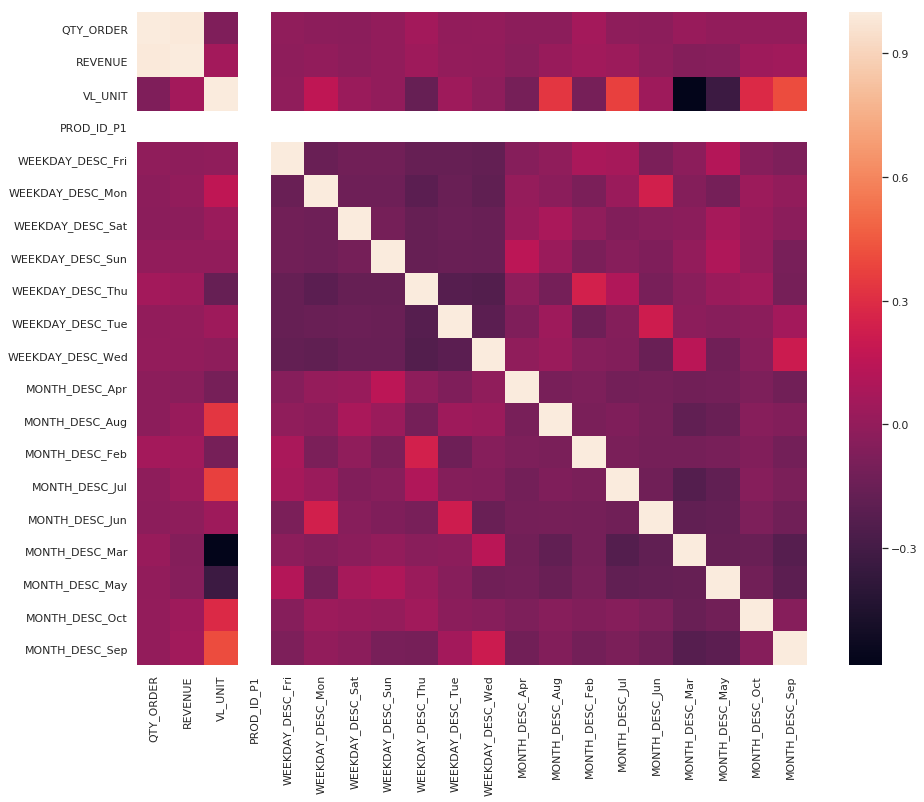

In [30]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p1.corr().astype(float).corr(), vmax=1.0)

plt.show()

- É possível observar poucas correlações entre as variáveis.

In [31]:
X = df_p1.drop('QTY_ORDER', axis=1)
y = df_p1['QTY_ORDER']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2863, 19), (1228, 19))

In [33]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P1,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
832,1429.00,1429.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
856,1399.00,1399.00,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3438,1490.17,1490.17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2382,1499.00,1499.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2124,1499.00,1499.00,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
model_v1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_v1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_v1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P1..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


- Somente a variável REVENUE tem um grau de importância.

In [35]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2863, 1), (1228, 1))

In [36]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(10):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.961737793795374
1          0.8582019206803876                  -0.0013863549912849216
2          0.9599946103212348                  0.5617701982696841
3          1.0                  0.961737793795374
4          1.0                  0.961737793795374
5          1.0                  0.961737793795374
6          1.0                  0.961737793795374
7          1.0                  0.961737793795374
8          1.0                  0.961737793795374
9          1.0                  0.961737793795374


- Análise dos scores para analisar possíveis overfitting.

In [37]:
model_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.04942668047392025


- O RMSE indica que a média dos erros variam 0.0494 tanto para cima quanto para baixo.

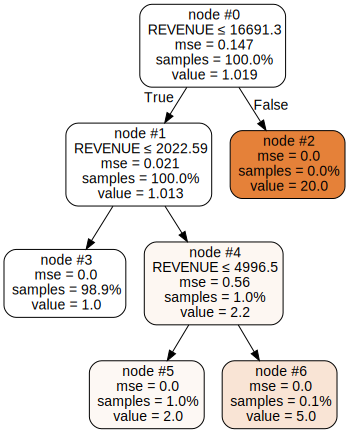

In [38]:
dot_data = tree.export_graphviz(
    model_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p1', view=False)
graph

### Linear Regression

In [39]:
model_2 = LinearRegression().fit(X_train, y_train)

model_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.9801557614485283, 0.9489327961581638)

Ao analisar o resultado, é possível observar que não há overfitting nos dados.

In [40]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_2.predict(X_test))**0.5))

RMSE: 0.05710149508183192


O modelo utilizando árvore de decisão nos retorna um RMSE menor do que com a regressão linear

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

- O RMSE indica que a média dos erros variam 0.1782 tanto para cima quanto para baixo.
- Mesmo utilizando o otimizador de parâmetros, o RMSE é maior do que o modelo principal.

## 7.2. P2

In [41]:
df_p2 = df_sales[df_sales['PROD_ID'] == 'P2'].reset_index(drop=True)
df_p2.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P2,2015-06-23,1.0,649.00,2015,6,23,1,649.00
1,P2,2015-07-29,1.0,664.05,2015,7,29,2,664.05
2,P2,2015-07-31,1.0,664.05,2015,7,31,4,664.05
3,P2,2015-07-31,1.0,664.05,2015,7,31,4,664.05
4,P2,2015-09-04,1.0,658.99,2015,9,4,4,658.99


In [42]:
weekdays = get_weekday()

df_p2.loc[:, 'WEEKDAY_DESC'] = df_p2['WEEKDAY'].map(lambda x: weekdays[x])
df_p2.loc[:, 'MONTH_DESC'] = df_p2['MONTH'].map(set_month)

In [43]:
df_p2.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P2,2015-06-23,1.0,649.00,2015,6,23,1,649.00,Tue,Jun
1,P2,2015-07-29,1.0,664.05,2015,7,29,2,664.05,Wed,Jul
2,P2,2015-07-31,1.0,664.05,2015,7,31,4,664.05,Fri,Jul
3,P2,2015-07-31,1.0,664.05,2015,7,31,4,664.05,Fri,Jul
4,P2,2015-09-04,1.0,658.99,2015,9,4,4,658.99,Fri,Sep


In [44]:
df_p2 = pd.get_dummies(df_p2.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [45]:
df_p2.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P2,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,...,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jan,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,649.00,649.00,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1.0,664.05,664.05,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,664.05,664.05,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,664.05,664.05,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,658.99,658.99,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


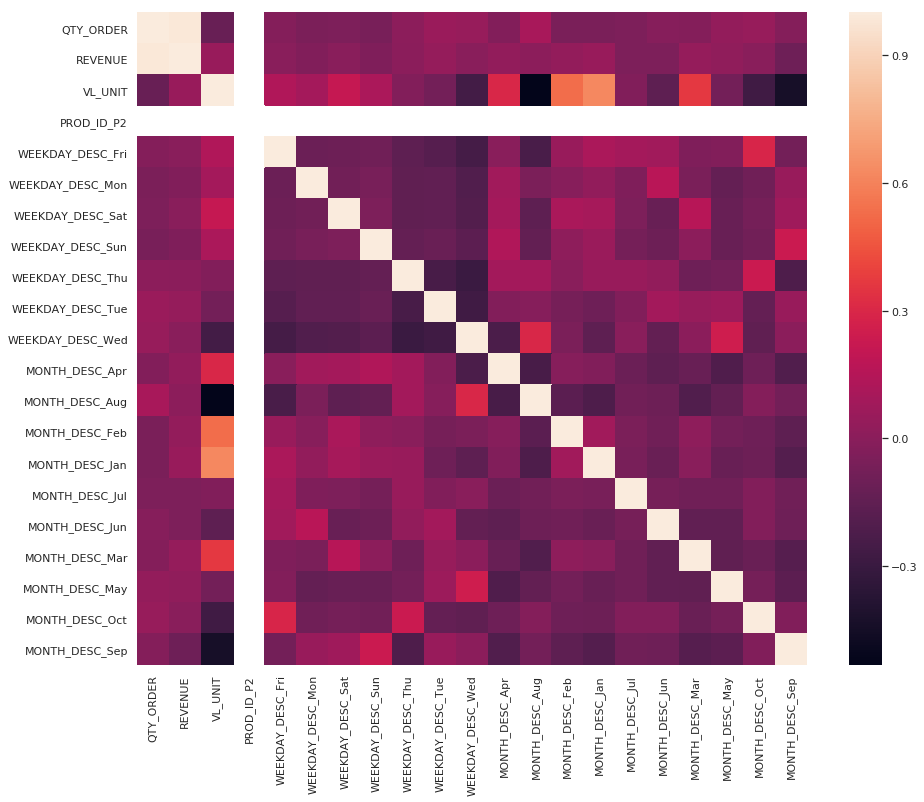

In [46]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p2.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [47]:
X = df_p2.drop('QTY_ORDER', axis=1)
y = df_p2['QTY_ORDER']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((44350, 20), (19008, 20))

In [49]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P2,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jan,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
6078,699.0,699.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6948,829.0,829.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
50796,829.0,829.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
54247,749.0,749.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2618,1220.0,610.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [50]:
model_p2_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p2_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p2_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P2..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jan......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [51]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((44350, 1), (19008, 1))

In [52]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9892736960547803
1          0.4629212626677194                  0.3139646341186453
2          0.8734426216770328                  0.8444441799761939
3          0.9763108243319876                  0.9629230198334154
4          0.9934131064275088                  0.9848824318541084
5          0.9963953048002374                  0.986724481728117
6          0.9973614816731585                  0.9882986837272717
7          0.9988001445822774                  0.9889202931012852
8          0.9994357421826869                  0.9892627969730005
9          0.999766367421488                  0.9893716452007544
10          0.9998744285354415                  0.9894022473143231


In [53]:
model_p2_2 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p2_2.fit(X_train, y_train)

y_pred = model_p2_2.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.12386261748443689


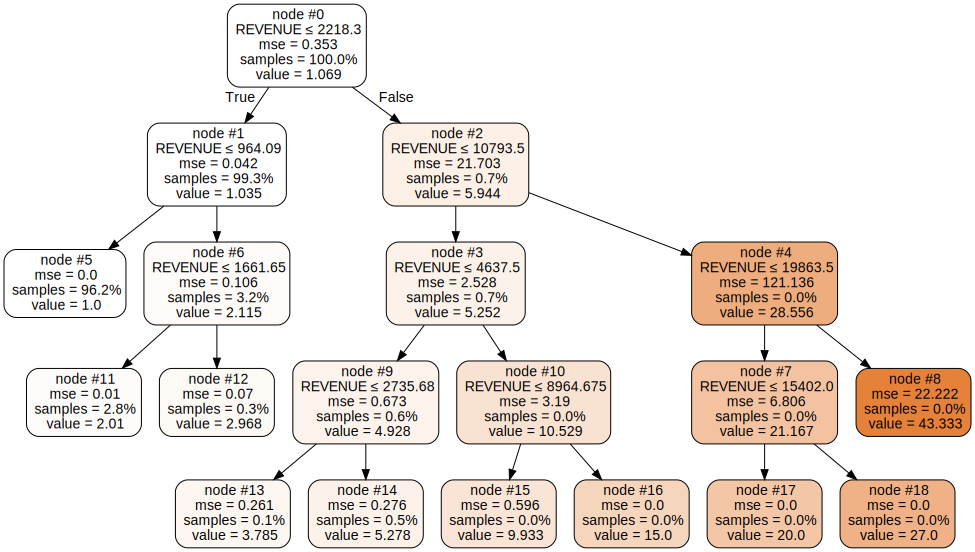

In [54]:
dot_data = tree.export_graphviz(
    model_p2_2,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p2', view=False)
graph

### Linear Regression

In [55]:
model_p2_2 = LinearRegression().fit(X_train, y_train)

model_p2_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.9519680803258193, 0.14869517896061402)

Ao analisar o resultado acima é posssível observar um overfitting nos dados, pois o score com os dados de treino há um percentual de acerto de 95% e para a base de teste apenas 15%

In [56]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_2.predict(X_test))**0.5))

RMSE: 0.7780961856085976


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p2_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

## 7.3. P3

In [57]:
df_p3 = df_sales[df_sales['PROD_ID'] == 'P3'].reset_index(drop=True)
df_p3.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P3,2015-07-31,1.0,1049.0,2015,7,31,4,1049.0
1,P3,2015-07-31,1.0,1049.0,2015,7,31,4,1049.0
2,P3,2015-08-02,1.0,1098.0,2015,8,2,6,1098.0
3,P3,2015-07-21,1.0,1098.0,2015,7,21,1,1098.0
4,P3,2015-07-25,1.0,1149.0,2015,7,25,5,1149.0


In [58]:
weekdays = get_weekday()

df_p3.loc[:, 'WEEKDAY_DESC'] = df_p3['WEEKDAY'].map(lambda x: weekdays[x])
df_p3.loc[:, 'MONTH_DESC'] = df_p3['MONTH'].map(set_month)

In [59]:
df_p3.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P3,2015-07-31,1.0,1049.0,2015,7,31,4,1049.0,Fri,Jul
1,P3,2015-07-31,1.0,1049.0,2015,7,31,4,1049.0,Fri,Jul
2,P3,2015-08-02,1.0,1098.0,2015,8,2,6,1098.0,Sun,Aug
3,P3,2015-07-21,1.0,1098.0,2015,7,21,1,1098.0,Tue,Jul
4,P3,2015-07-25,1.0,1149.0,2015,7,25,5,1149.0,Sat,Jul


In [60]:
df_p3 = pd.get_dummies(df_p3.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [61]:
df_p3.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P3,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,1049.0,1049.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,1049.0,1049.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1.0,1098.0,1098.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,1098.0,1098.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1.0,1149.0,1149.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


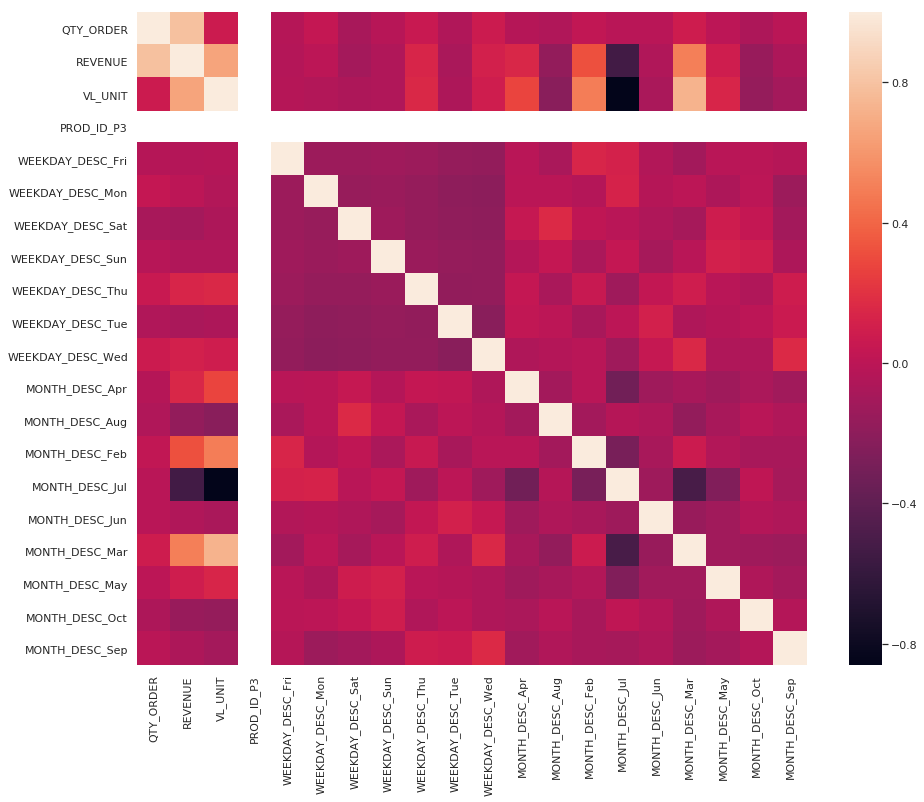

In [62]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p3.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [63]:
X = df_p3.drop('QTY_ORDER', axis=1)
y = df_p3['QTY_ORDER']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2029, 19), (870, 19))

In [65]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P3,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
453,1399.00,1399.00,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1240,1349.10,1349.10,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1780,1098.00,1098.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
700,1149.90,1149.90,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2892,1166.96,1166.96,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
model_p3_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p3_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p3_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P3..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [67]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2029, 1), (870, 1))

In [68]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(10):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9740832315529209
1          0.7842414518597226                  0.6108267507303247
2          0.9604525327853224                  0.9717610891000626
3          1.0                  0.9740832315529209
4          1.0                  0.9740832315529209
5          1.0                  0.9740832315529209
6          1.0                  0.9740832315529209
7          1.0                  0.9740832315529209
8          1.0                  0.9740832315529209
9          1.0                  0.9740832315529209


In [69]:
model_p3_2 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p3_2.fit(X_train, y_train)

y_pred = model_p3_2.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.03390317518104052


In [70]:
X_train.columns

Index(['REVENUE'], dtype='object')

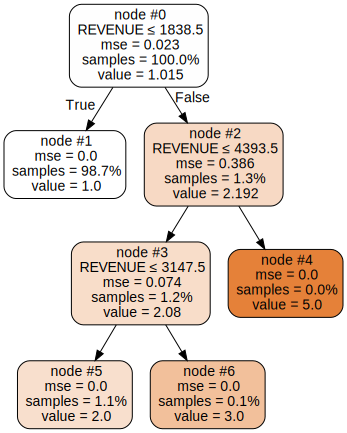

In [71]:
dot_data = tree.export_graphviz(
    model_p3_2,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p3', view=False)
graph

### Linear Regression

In [72]:
model_p3_2 = LinearRegression().fit(X_train, y_train)

model_p3_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.6133499377491359, 0.2828153111655276)

In [73]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p3_2.predict(X_test))**0.5))

RMSE: 0.11172574996090387


### GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p3_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.1313776349926552


## 7.4 P4

In [76]:
df_p4 = df_sales[df_sales['PROD_ID'] == 'P4'].reset_index(drop=True)
df_p4.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P4,2015-07-25,1.0,540.55,2015,7,25,5,540.55
1,P4,2015-08-26,1.0,499.90,2015,8,26,2,499.90
2,P4,2015-08-05,1.0,569.00,2015,8,5,2,569.00
3,P4,2015-07-26,1.0,689.99,2015,7,26,6,689.99
4,P4,2015-07-26,1.0,689.90,2015,7,26,6,689.90


In [77]:
weekdays = get_weekday()

df_p4.loc[:, 'WEEKDAY_DESC'] = df_p4['WEEKDAY'].map(lambda x: weekdays[x])
df_p4.loc[:, 'MONTH_DESC'] = df_p4['MONTH'].map(set_month)

In [78]:
df_p4.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P4,2015-07-25,1.0,540.55,2015,7,25,5,540.55,Sat,Jul
1,P4,2015-08-26,1.0,499.90,2015,8,26,2,499.90,Wed,Aug
2,P4,2015-08-05,1.0,569.00,2015,8,5,2,569.00,Wed,Aug
3,P4,2015-07-26,1.0,689.99,2015,7,26,6,689.99,Sun,Jul
4,P4,2015-07-26,1.0,689.90,2015,7,26,6,689.90,Sun,Jul


In [79]:
df_p4 = pd.get_dummies(df_p4.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [80]:
df_p4.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P4,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,540.55,540.55,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,499.90,499.90,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1.0,569.00,569.00,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1.0,689.99,689.99,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1.0,689.90,689.90,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


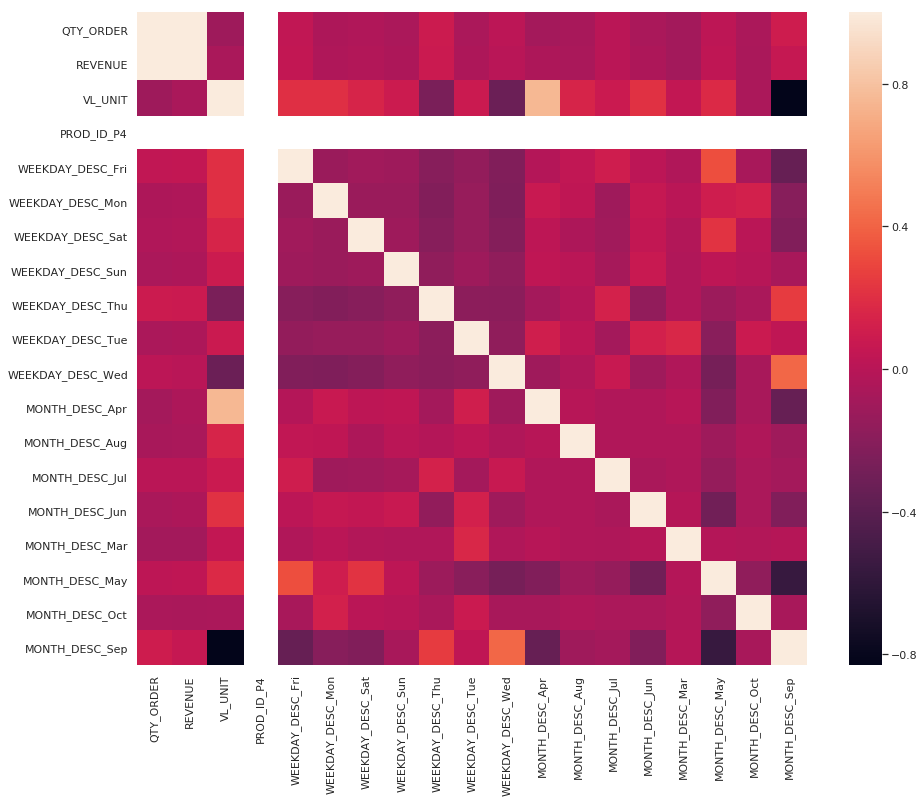

In [81]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p4.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [82]:
X = df_p4.drop('QTY_ORDER', axis=1)
y = df_p4['QTY_ORDER']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((10259, 18), (4397, 18))

In [84]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P4,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
13845,429.0,429.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2649,499.0,499.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
12127,428.8,428.8,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
13757,429.0,429.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1942,569.0,569.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
model_p4_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p4_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p4_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P4..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [86]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((10259, 1), (4397, 1))

In [87]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9934363118847349
1          0.7772464986732381                  0.7706406079993345
2          0.9242261534954784                  0.9410829185349286
3          0.9877815203934586                  0.9850114919782668
4          0.9980157840367083                  0.9930160903356664
5          0.9992849728363331                  0.9932311262701466
6          0.9996101423104868                  0.9933309133203878
7          0.9998426732528809                  0.993399307037347
8          0.9999843074302864                  0.9934331410209112
9          1.0                  0.9934363118847349
10          1.0                  0.9934363118847349


In [88]:
model_p4_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p4_1.fit(X_train, y_train)

y_pred = model_p4_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.30074478131110083


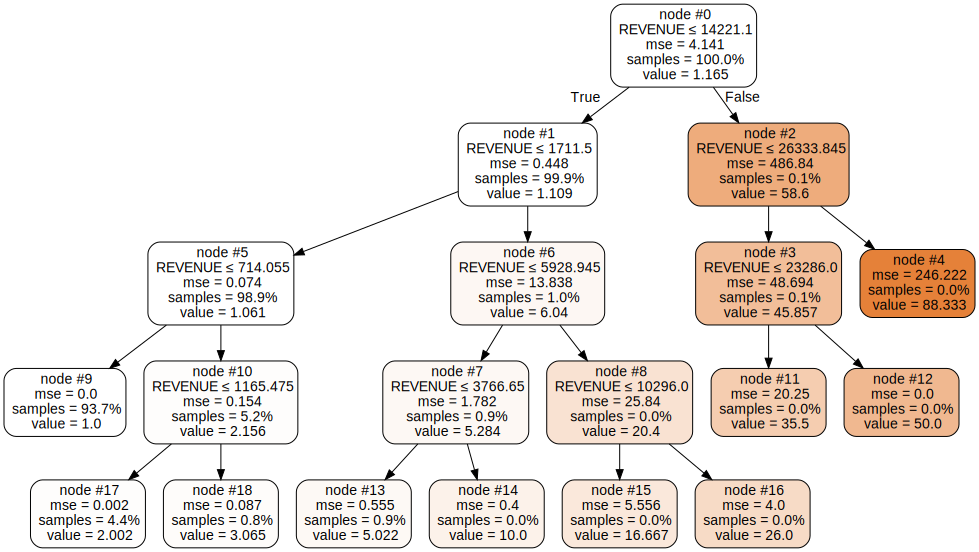

In [89]:
dot_data = tree.export_graphviz(
    model_p4_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p4', view=False)
graph

### Linear Regression

In [90]:
model_p4_2 = LinearRegression().fit(X_train, y_train)

model_p4_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.9887849156240248, 0.5145615385778184)

In [91]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p4_2.predict(X_test))**0.5))

RMSE: 0.16050540184482984


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p4_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

## 7.5 P5

In [92]:
df_p5 = df_sales[df_sales['PROD_ID'] == 'P5'].reset_index(drop=True)
df_p5.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P5,2015-07-25,1.0,935.0,2015,7,25,5,935.0
1,P5,2015-07-22,1.0,799.0,2015,7,22,2,799.0
2,P5,2015-07-21,1.0,799.0,2015,7,21,1,799.0
3,P5,2015-07-17,1.0,749.0,2015,7,17,4,749.0
4,P5,2015-07-21,1.0,799.0,2015,7,21,1,799.0


In [93]:
weekdays = get_weekday()

df_p5.loc[:, 'WEEKDAY_DESC'] = df_p5['WEEKDAY'].map(lambda x: weekdays[x])
df_p5.loc[:, 'MONTH_DESC'] = df_p5['MONTH'].map(set_month)

In [94]:
df_p5.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P5,2015-07-25,1.0,935.0,2015,7,25,5,935.0,Sat,Jul
1,P5,2015-07-22,1.0,799.0,2015,7,22,2,799.0,Wed,Jul
2,P5,2015-07-21,1.0,799.0,2015,7,21,1,799.0,Tue,Jul
3,P5,2015-07-17,1.0,749.0,2015,7,17,4,749.0,Fri,Jul
4,P5,2015-07-21,1.0,799.0,2015,7,21,1,799.0,Tue,Jul


In [95]:
df_p5 = pd.get_dummies(df_p5.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [96]:
df_p5.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P5,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,935.0,935.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1.0,799.0,799.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1.0,799.0,799.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1.0,749.0,749.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,799.0,799.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


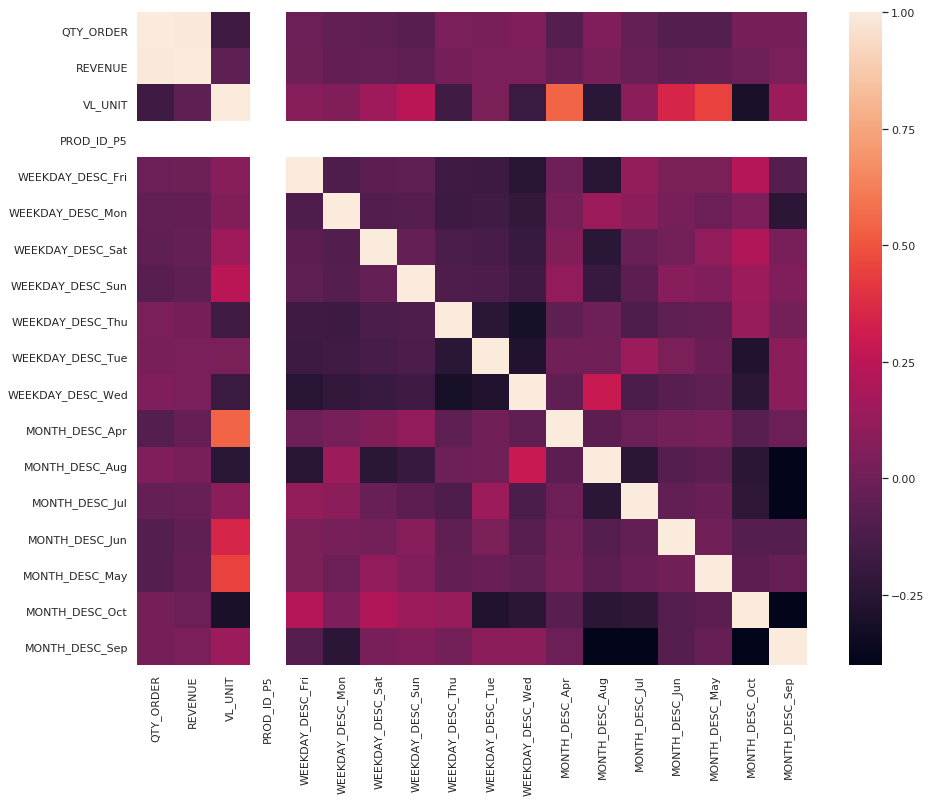

In [97]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p5.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [98]:
X = df_p5.drop('QTY_ORDER', axis=1)
y = df_p5['QTY_ORDER']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((13842, 17), (5933, 17))

In [100]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P5,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
3062,749.00,749.00,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
19250,799.00,799.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
17789,735.79,735.79,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
18609,735.79,735.79,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6381,779.00,779.00,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [101]:
model_p5_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p5_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p5_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9959974248749486
VL_UNIT.............:0.003745542360319987
PROD_ID_P5..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.00025703276473145956
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [102]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((13842, 1), (5933, 1))

In [103]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9936678416620279
1          0.5021550729906958                  0.3458651946248169
2          0.9793415322994393                  0.9836374917770825
3          0.9928386263448529                  0.9912729263608759
4          0.9955945828796501                  0.9927211355985246
5          0.9973453771244243                  0.9923205746194764
6          0.9987409678406036                  0.9929309290563108
7          0.9995852107028943                  0.9933542927588191
8          0.9996773861022512                  0.9934384156352898
9          1.0                  0.9936678416620279
10          1.0                  0.9936678416620279


In [104]:
model_p5_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p5_1.fit(X_train, y_train)

y_pred = model_p5_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.06476676888401511


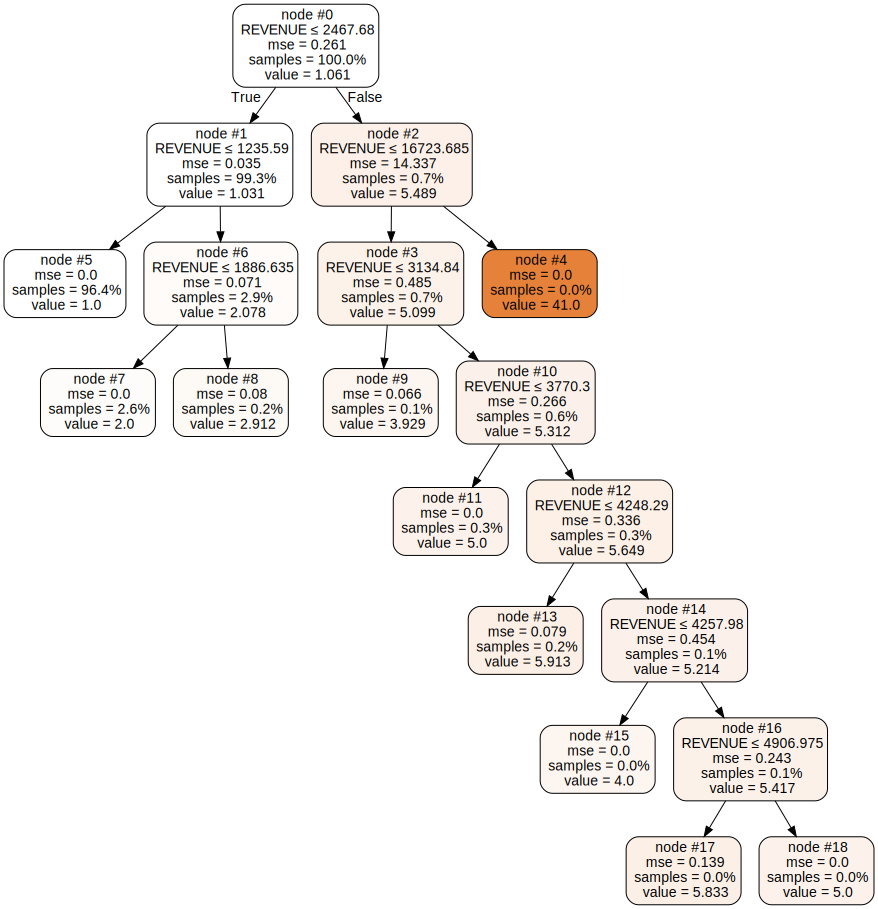

In [105]:
dot_data = tree.export_graphviz(
    model_p5_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p5', view=False)
graph

### Linear Regression

In [106]:
model_p5_2 = LinearRegression().fit(X_train, y_train)
model_p5_2.score(X_train, y_train), model_p5_2.score(X_test, y_test)

(0.9611069728242423, 0.9841457533797849)

In [107]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p5_2.predict(X_test))**0.5))

RMSE: 0.0985198326851229


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p5_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

## 7.6 P6

In [108]:
df_p6 = df_sales[df_sales['PROD_ID'] == 'P6'].reset_index(drop=True)
df_p6.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P6,2015-08-02,1.0,1808.99,2015,8,2,6,1808.99
1,P6,2015-08-17,1.0,1674.00,2015,8,17,0,1674.00
2,P6,2015-08-17,1.0,1673.95,2015,8,17,0,1673.95
3,P6,2015-08-11,1.0,1674.00,2015,8,11,1,1674.00
4,P6,2015-08-17,1.0,1674.00,2015,8,17,0,1674.00


In [109]:
weekdays = get_weekday()

df_p6.loc[:, 'WEEKDAY_DESC'] = df_p6['WEEKDAY'].map(lambda x: weekdays[x])
df_p6.loc[:, 'MONTH_DESC'] = df_p6['MONTH'].map(set_month)

In [110]:
df_p6.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P6,2015-08-02,1.0,1808.99,2015,8,2,6,1808.99,Sun,Aug
1,P6,2015-08-17,1.0,1674.00,2015,8,17,0,1674.00,Mon,Aug
2,P6,2015-08-17,1.0,1673.95,2015,8,17,0,1673.95,Mon,Aug
3,P6,2015-08-11,1.0,1674.00,2015,8,11,1,1674.00,Tue,Aug
4,P6,2015-08-17,1.0,1674.00,2015,8,17,0,1674.00,Mon,Aug


In [111]:
df_p6 = pd.get_dummies(df_p6.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [112]:
df_p6.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P6,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,...,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jan,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,1808.99,1808.99,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,1674.00,1674.00,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1673.95,1673.95,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,1674.00,1674.00,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.0,1674.00,1674.00,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


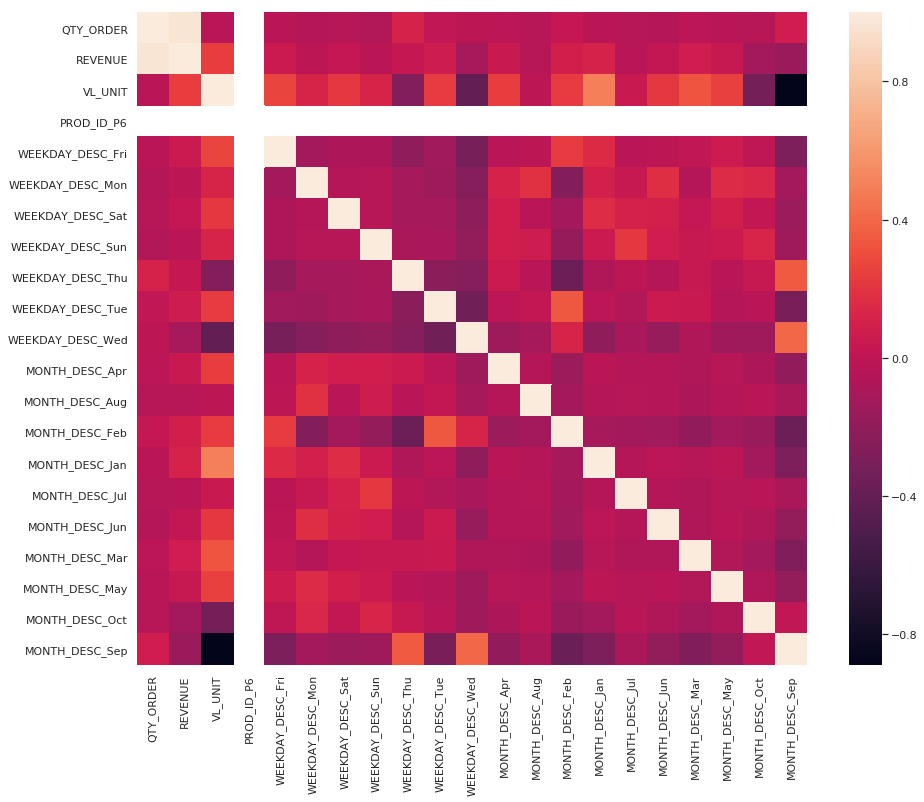

In [113]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p6.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [114]:
X = df_p6.drop('QTY_ORDER', axis=1)
y = df_p6['QTY_ORDER']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2871, 20), (1231, 20))

In [116]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P6,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jan,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
3733,1273.09,1273.09,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1240,1399.00,1399.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
235,1399.00,1399.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3181,1665.56,1665.56,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2430,1473.89,1473.89,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [117]:
model_p6_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p6_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p6_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9996043021494209
VL_UNIT.............:0.00039569785057918914
PROD_ID_P6..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jan......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [118]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2871, 1), (1231, 1))

In [119]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9538640281837943
1          0.7509274379709331                  -0.0014367191558384285
2          0.9607350641844321                  0.8533260104608122
3          0.994972054446752                  0.9397517593557273
4          0.9991376874380973                  0.8885047347775028
5          0.9993101499504778                  0.9128542754582781
6          1.0                  0.9538640281837943
7          1.0                  0.9538640281837943
8          1.0                  0.9538640281837943
9          1.0                  0.9538640281837943
10          1.0                  0.9538640281837943


In [120]:
model_p6_1 = DecisionTreeRegressor(
    max_depth=6,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p6_1.fit(X_train, y_train)

y_pred = model_p6_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.03041666898501042


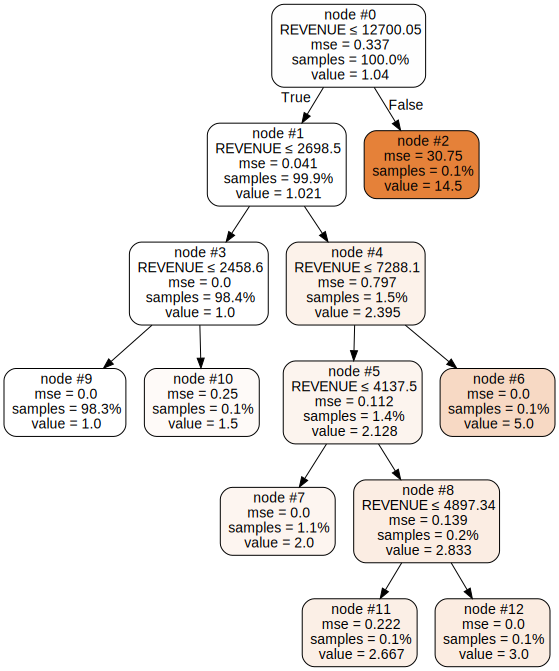

In [121]:
dot_data = tree.export_graphviz(
    model_p6_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p6', view=False)
graph

### Linear Regression

In [122]:
model_p6_2 = LinearRegression().fit(X_train, y_train)

model_p6_2.score(X_train, y_train), model_p6_2.score(X_test, y_test)

(0.9437500074956231, -0.08621520949484274)

In [123]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p6_2.predict(X_test))**0.5))

RMSE: 0.1382958273441003


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p6_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

## 7.7 P7

In [124]:
df_p7 = df_sales[df_sales['PROD_ID'] == 'P7'].reset_index(drop=True)
df_p7.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P7,2015-07-31,1.0,749.0,2015,7,31,4,749.0
1,P7,2015-07-25,1.0,749.0,2015,7,25,5,749.0
2,P7,2015-08-02,1.0,752.0,2015,8,2,6,752.0
3,P7,2015-08-02,1.0,752.0,2015,8,2,6,752.0
4,P7,2015-07-17,1.0,749.0,2015,7,17,4,749.0


In [125]:
weekdays = get_weekday()

df_p7.loc[:, 'WEEKDAY_DESC'] = df_p7['WEEKDAY'].map(lambda x: weekdays[x])
df_p7.loc[:, 'MONTH_DESC'] = df_p7['MONTH'].map(set_month)

In [126]:
df_p7.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P7,2015-07-31,1.0,749.0,2015,7,31,4,749.0,Fri,Jul
1,P7,2015-07-25,1.0,749.0,2015,7,25,5,749.0,Sat,Jul
2,P7,2015-08-02,1.0,752.0,2015,8,2,6,752.0,Sun,Aug
3,P7,2015-08-02,1.0,752.0,2015,8,2,6,752.0,Sun,Aug
4,P7,2015-07-17,1.0,749.0,2015,7,17,4,749.0,Fri,Jul


In [127]:
df_p7 = pd.get_dummies(df_p7.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [128]:
df_p7.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P7,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,...,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jan,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,749.0,749.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,749.0,749.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,752.0,752.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,752.0,752.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,749.0,749.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


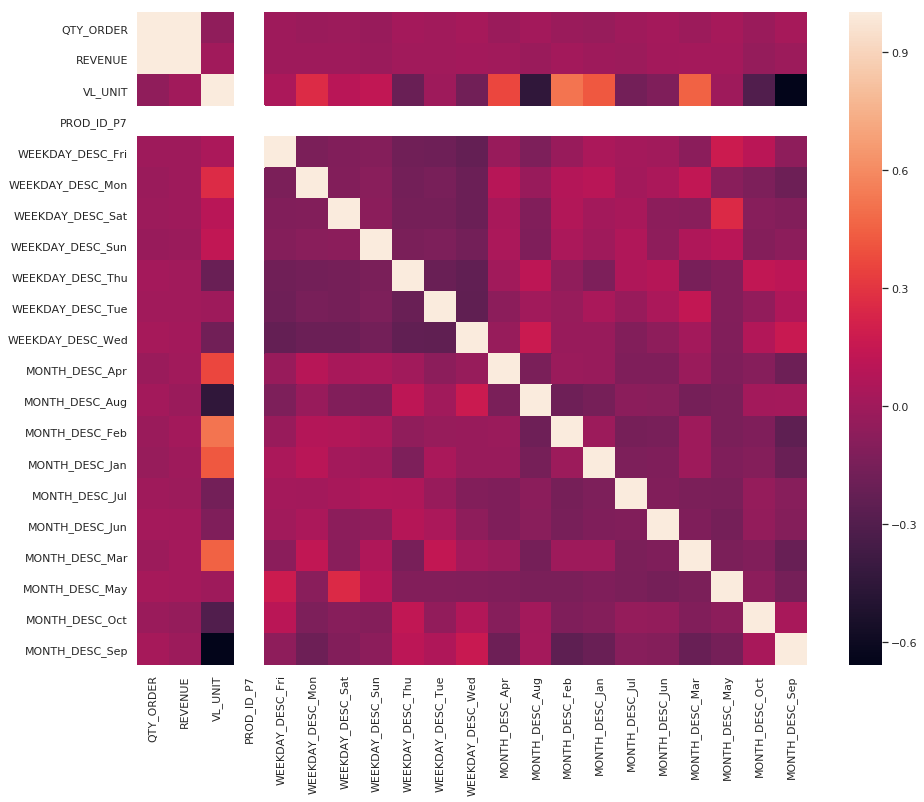

In [129]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p7.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [130]:
X = df_p7.drop('QTY_ORDER', axis=1)
y = df_p7['QTY_ORDER']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((137157, 20), (58782, 20))

In [132]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P7,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Feb,MONTH_DESC_Jan,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
114855,699.0,699.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
18959,849.0,849.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
49508,749.0,749.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
145748,799.0,799.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
172134,1598.0,799.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [133]:
model_p7_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p7_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p7_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P7..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jan......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [134]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((137157, 1), (58782, 1))

In [135]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          0.9999976697482542                  0.9913606561686186
1          0.8700760172929376                  -1.4199198015818482e-05
2          0.9357408307498568                  0.5454259232685112
3          0.9822242701392679                  0.8832652973015668
4          0.9932716282513054                  0.9321673886821306
5          0.9987357724258162                  0.9762234961233317
6          0.9993767708467075                  0.9870682692335747
7          0.9995409718562082                  0.9884266417640148
8          0.9996980005589137                  0.989391493015033
9          0.9998314639396958                  0.9906455925050004
10          0.9999205501214902                  0.9912245527668668


In [136]:
model_p7_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p7_1.fit(X_train, y_train)

y_pred = model_p7_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.07029139796234884


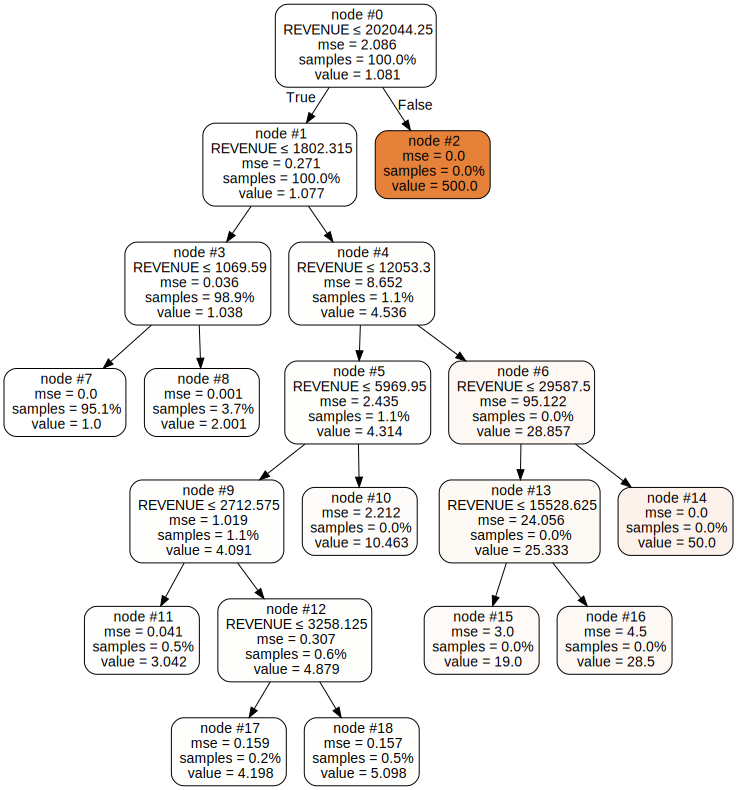

In [137]:
dot_data = tree.export_graphviz(
    model_p7_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p7', view=False)
graph

### Linear Regression

In [138]:
model_p7_2 = LinearRegression().fit(X_train, y_train)

model_p7_2.score(X_train, y_train), model_p7_2.score(X_test, y_test)

(0.9958492868620777, 0.9671322260536097)

In [139]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p7_2.predict(X_test))**0.5))

RMSE: 0.08857551941952982


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p7_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

## 7.8 P8

In [140]:
df_p8 = df_sales[df_sales['PROD_ID'] == 'P8'].reset_index(drop=True)
df_p8.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P8,2015-07-28,4.0,1604.00,2015,7,28,1,401.00
1,P8,2015-07-30,1.0,388.16,2015,7,30,3,388.16
2,P8,2015-07-31,1.0,388.16,2015,7,31,4,388.16
3,P8,2015-07-29,1.0,448.52,2015,7,29,2,448.52
4,P8,2015-07-25,1.0,439.00,2015,7,25,5,439.00


In [141]:
weekdays = get_weekday()

df_p8.loc[:, 'WEEKDAY_DESC'] = df_p8['WEEKDAY'].map(lambda x: weekdays[x])
df_p8.loc[:, 'MONTH_DESC'] = df_p8['MONTH'].map(set_month)

In [142]:
df_p8.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P8,2015-07-28,4.0,1604.00,2015,7,28,1,401.00,Tue,Jul
1,P8,2015-07-30,1.0,388.16,2015,7,30,3,388.16,Thu,Jul
2,P8,2015-07-31,1.0,388.16,2015,7,31,4,388.16,Fri,Jul
3,P8,2015-07-29,1.0,448.52,2015,7,29,2,448.52,Wed,Jul
4,P8,2015-07-25,1.0,439.00,2015,7,25,5,439.00,Sat,Jul


In [143]:
df_p8 = pd.get_dummies(df_p8.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [144]:
df_p8.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P8,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,4.0,1604.00,401.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1.0,388.16,388.16,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1.0,388.16,388.16,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,448.52,448.52,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1.0,439.00,439.00,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


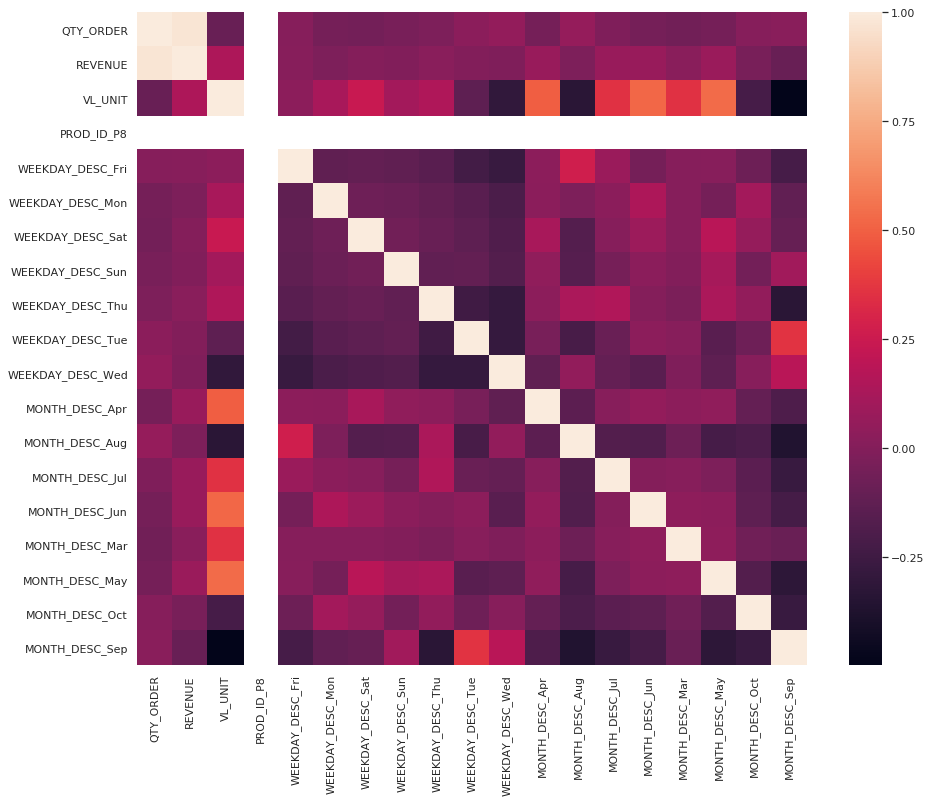

In [145]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p8.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [172]:
X = df_p8.drop('QTY_ORDER', axis=1)
y = df_p8['QTY_ORDER']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((19488, 18), (8352, 18))

In [148]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P8,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
20272,443.33,443.33,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
11406,379.00,379.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12181,394.90,394.90,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2715,398.00,398.00,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
14401,449.10,449.10,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [149]:
model_p8_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p8_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p8_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9963749448416332
VL_UNIT.............:0.0036250551583667857
PROD_ID_P8..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [180]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((19488, 1), (8352, 1))

In [151]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(20):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.7064455861746846
1          0.6194515854197991                  0.23686661502531925
2          0.887021500100428                  0.4249047232781906
3          0.9748187188162589                  0.6150447648447481
4          0.9904101172309708                  0.7049298464438631
5          0.994222620610016                  0.7056945669820361
6          0.9960517686596896                  0.705472877101089
7          0.9976580809325994                  0.7059621672115832
8          0.9987094263203843                  0.705952566298199
9          0.9992917583465523                  0.7062886793554413
10          0.9994603873116589                  0.7062883070089314
11          0.9996222711181613                  0.7063872022419428
12          1.0                  0.7064455861746846
13          1.0                  0.7064455861746846
14          1.

Analisar o overfitting

In [185]:
grid_cv_dtm.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [215]:
model_p8_1 = DecisionTreeRegressor(
    random_state=0, 
    max_depth=4,
    max_leaf_nodes=20, 
    min_samples_leaf=20, 
    min_samples_split=10
)
model_p8_1.fit(X_train, np.log(y_train))

train_score = dt.score(X_train, np.log(y_train))
test_score = dt.score(X_test, np.log(y_test))

y_pred = model_p8_2.predict(X_test)

print(train_score, test_score)
print('\nRMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

0.9946097215603933 0.9774998664683455

RMSE: 0.14378662021572808


In [152]:
model_p8_2 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p8_2.fit(X_train, y_train)

y_pred = model_p8_2.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.4424958825731574


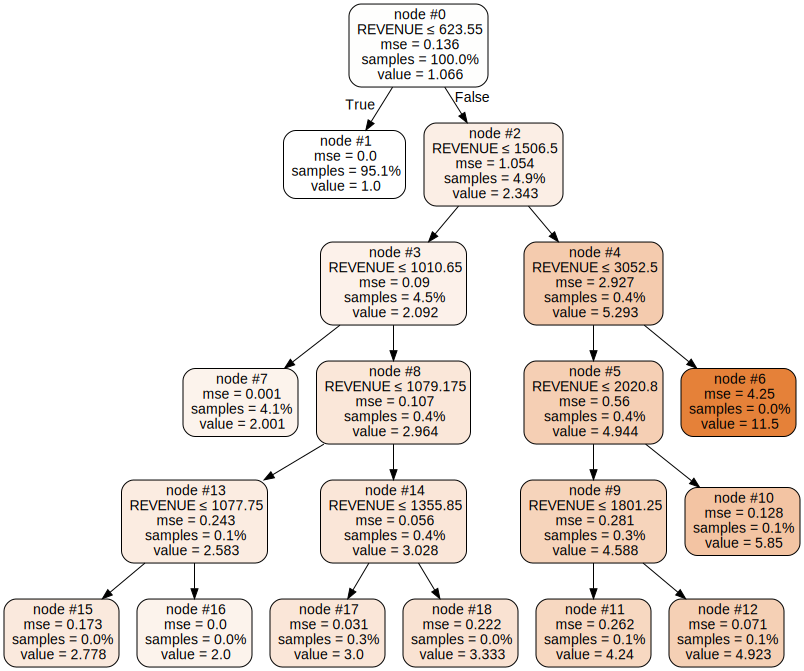

In [153]:
dot_data = tree.export_graphviz(
    model_p8_2,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p8', view=False)
graph

### Linear Regression

In [154]:
model_p8_2 = LinearRegression().fit(X_train, y_train)

model_p8_2.score(X_train, y_train), model_p8_2.score(X_test, y_test)

(0.8931068393921764, 0.9596744059639482)

In [155]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p7_2.predict(X_test))**0.5))

RMSE: 0.6316380353527667


### GridSearchCV

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p8_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

## 7.9 P9

In [156]:
df_p9 = df_sales[df_sales['PROD_ID'] == 'P9'].reset_index(drop=True)
df_p9.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
0,P9,2015-09-24,1.0,399.0,2015,9,24,3,399.0
1,P9,2015-08-02,1.0,435.0,2015,8,2,6,435.0
2,P9,2015-07-25,2.0,878.0,2015,7,25,5,439.0
3,P9,2015-08-02,1.0,435.0,2015,8,2,6,435.0
4,P9,2015-08-02,1.0,435.0,2015,8,2,6,435.0


In [157]:
weekdays = get_weekday()

df_p9.loc[:, 'WEEKDAY_DESC'] = df_p9['WEEKDAY'].map(lambda x: weekdays[x])
df_p9.loc[:, 'MONTH_DESC'] = df_p9['MONTH'].map(set_month)

In [158]:
df_p9.head()

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT,WEEKDAY_DESC,MONTH_DESC
0,P9,2015-09-24,1.0,399.0,2015,9,24,3,399.0,Thu,Sep
1,P9,2015-08-02,1.0,435.0,2015,8,2,6,435.0,Sun,Aug
2,P9,2015-07-25,2.0,878.0,2015,7,25,5,439.0,Sat,Jul
3,P9,2015-08-02,1.0,435.0,2015,8,2,6,435.0,Sun,Aug
4,P9,2015-08-02,1.0,435.0,2015,8,2,6,435.0,Sun,Aug


In [159]:
df_p9 = pd.get_dummies(df_p9.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [160]:
df_p9.head()

,QTY_ORDER,REVENUE,VL_UNIT,PROD_ID_P9,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
0,1.0,399.0,399.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1.0,435.0,435.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2.0,878.0,439.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,435.0,435.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,1.0,435.0,435.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


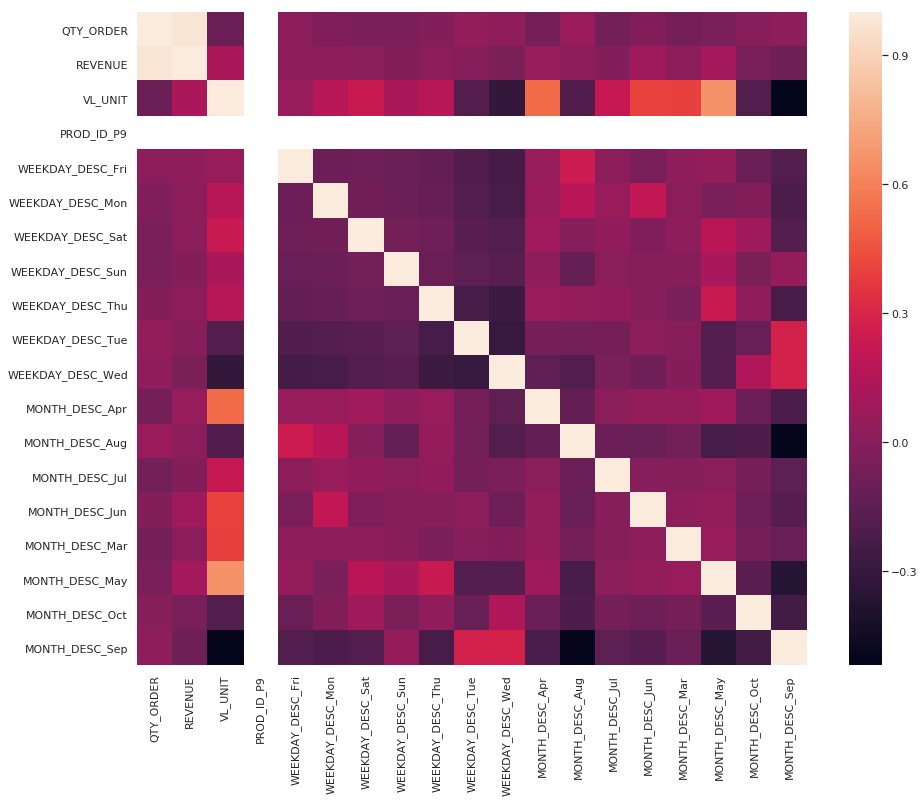

In [161]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p9.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [162]:
X = df_p9.drop('QTY_ORDER', axis=1)
y = df_p9['QTY_ORDER']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((12901, 18), (5530, 18))

In [164]:
X_train.head()

,REVENUE,VL_UNIT,PROD_ID_P9,WEEKDAY_DESC_Fri,WEEKDAY_DESC_Mon,WEEKDAY_DESC_Sat,WEEKDAY_DESC_Sun,WEEKDAY_DESC_Thu,WEEKDAY_DESC_Tue,WEEKDAY_DESC_Wed,MONTH_DESC_Apr,MONTH_DESC_Aug,MONTH_DESC_Jul,MONTH_DESC_Jun,MONTH_DESC_Mar,MONTH_DESC_May,MONTH_DESC_Oct,MONTH_DESC_Sep
11690,379.0,379.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5949,479.0,479.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9828,379.0,379.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
17094,379.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
11589,379.0,379.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [165]:
model_p9_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p9_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p9_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9982094076227004
VL_UNIT.............:0.0017905923772996676
PROD_ID_P9..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [166]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((12901, 1), (5530, 1))

In [167]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9921423266670203
1          0.4813010636437708                  -1.9911374843584184e-05
2          0.8469868462311068                  0.6160819625457199
3          0.9735216420676012                  0.9347330305493862
4          0.9921438477284393                  0.9766781348037576
5          0.9978016069575787                  0.9975260482131473
6          0.9988333711445753                  0.9958452652952541
7          0.9995685366879464                  0.994616542145571
8          0.9997707851154716                  0.9934161291799838
9          0.9997860661077734                  0.9933700881252984
10          1.0                  0.9921423266670203


In [168]:
model_p9_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p9_1.fit(X_train, y_train)

y_pred = model_p9_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.022872041296605704


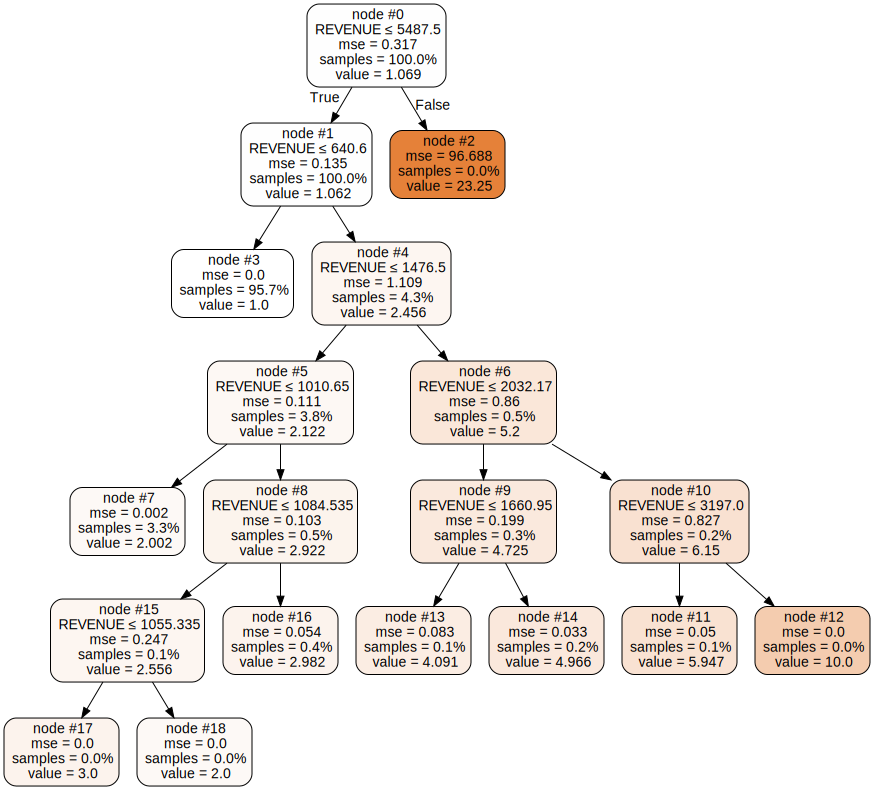

In [169]:
dot_data = tree.export_graphviz(
    model_p9_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('trees/tree_p9', view=False)
graph

### Linear Regression

In [170]:
model_p9_2 = LinearRegression().fit(X_train, y_train)

model_p9_2.score(X_train, y_train), model_p9_2.score(X_test, y_test)

(0.9408771792984054, 0.9029323961689564)

In [171]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p9_2.predict(X_test))**0.5))

RMSE: 0.11577191819146172


### GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p9_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))